# Covid-19 Notebook
## Original notebook by Leon Avery, PhD
https://www.facebook.com/leon.avery.10/posts/10221691168285770
Original version: http://www.math.uwaterloo.ca/~lavery/Covid-19/

This notebook has been adapted by Mark Kittisopikul, PhD, for general use. This notebook
1. Pulls data from Johns Hopkins University Center for Systems Science and Engineering at https://github.com/CSSEGISandData/COVID-19
2. Imports the data into a table via Pandas
3. Plots the data

## Retired

This version of the notebook has been retired due to changes at CSSEGISandData. It will no longer update.

# Other Works

## Using Python scientific tools for a (rough) analysis of COVID-19 data

https://medium.com/@santiagocasas/using-python-scientific-tools-for-a-rough-analysis-of-covid-19-data-d3ac58f474bf
https://colab.research.google.com/drive/1Q_VWV6XsD9yMNoKEQpQ9Xe23bwb0UFym

# Setup

In [ ]:
import os, csv
import datetime
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import numpy as np
%matplotlib inline
pd.plotting.register_matplotlib_converters()

In [ ]:
matplotlib.units.registry

{str: <matplotlib.category.StrCategoryConverter at 0x7fb3cd92da50>,
 numpy.str_: <matplotlib.category.StrCategoryConverter at 0x7fb3cd92da90>,
 bytes: <matplotlib.category.StrCategoryConverter at 0x7fb3cd92dad0>,
 numpy.bytes_: <matplotlib.category.StrCategoryConverter at 0x7fb3cd92db10>,
 datetime.datetime: <pandas.plotting._matplotlib.converter.DatetimeConverter at 0x7fb3be56f850>,
 datetime.date: <pandas.plotting._matplotlib.converter.DatetimeConverter at 0x7fb3c08a5b50>,
 numpy.datetime64: <pandas.plotting._matplotlib.converter.DatetimeConverter at 0x7fb3bf9fdfd0>,
 pandas._libs.tslibs.timestamps.Timestamp: <pandas.plotting._matplotlib.converter.DatetimeConverter at 0x7fb3b9768290>,
 pandas._libs.tslibs.period.Period: <pandas.plotting._matplotlib.converter.PeriodConverter at 0x7fb3b97683d0>,
 datetime.time: <pandas.plotting._matplotlib.converter.TimeConverter at 0x7fb3c08a5c10>}

In [ ]:
# This defines the default nation and series below
nation = 'US'
series = 'Confirmed'

In [ ]:
# Retrieve data via git
#datasource = 'https://github.com/CSSEGISandData/COVID-19.git'
# Stick with archive
datasource = 'https://github.com/mkitti/COVID-19.git'

if(os.path.isdir('csse_covid_19_data')):
  # Assume we are in a cloned git repository
  #subprocess.run(['git','remote','add','CSSEGISandData',datasource])
  #subprocess.run(['git','fetch','CSSEGISandData'])
  #subprocess.run(['git','merge','CSSEGISandData/master'])
  print('Data merged')
else:
  # Assume no data has been downloaded
  #subprocess.run(['git','clone',datasource])
  subprocess.run(['git','clone',datasource])
  os.chdir('COVID-19')
  subprocess.run(['git','checkout','lavery_notebook'])
  print('Data cloned')

Data merged


# Initial Data Examination and Prototyping

In [ ]:
covid19_dir = os.getcwd();
ts_file = os.path.join(
    covid19_dir,
    'csse_covid_19_data',
    'csse_covid_19_time_series',
    'time_series_19-covid-{series}.csv'.format(series=series)    
)
[
    covid19_dir,
    ts_file
];

In [ ]:
with open(ts_file, 'r') as csvfile:
    tsreader = csv.DictReader(csvfile)
    ts_data = list(tsreader)

In [ ]:
ts_frame = pd.read_csv(ts_file, parse_dates=True, date_parser=pd.to_datetime)
ts_frame

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
list(ts_frame.loc[:,'Country/Region']);

In [ ]:
nationrows = ts_frame.loc[:, 'Country/Region'] == nation
nationrows;

In [ ]:
nation_frame = ts_frame[nationrows]
nation_frame

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,572,643,904,1076,1014,1376,1524,1793,1996,1996.0
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,525,732,967,1706,2495,5365,8310,11710,15793,15793.0
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,340,426,557,698,751,952,1177,1364,1642,1642.0
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,138,164,197,218,218,328,413,525,646,646.0
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,46,46,47,47,47,47,49,49,49,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,...,3,5,5,5,5,5,14,21,23,23.0
431,Guam,US,13.4443,144.7937,0,0,0,0,0,0,...,0,3,3,3,5,12,14,15,27,27.0
448,Virgin Islands,US,18.3358,-64.8963,0,0,0,0,0,0,...,1,1,1,2,2,3,3,3,3,NaN
491,United States Virgin Islands,US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0


In [ ]:
nation_frame.aggregate(np.sum)[-7:]

3/17/20     6421
3/18/20     7783
3/19/20    13677
3/20/20    19100
3/21/20    25489
3/22/20    33272
3/23/20    33276
dtype: object

In [ ]:
nation_series = nation_frame.agg(np.sum)[4:]
[
    type(nation_series),
    nation_series
];

In [ ]:
strdates = nation_series.keys()
dates = [pd.to_datetime(sd) for sd in strdates]
[
    type(strdates),
    strdates,
    type(dates),
    dates,
    np.array(nation_series[:])
];

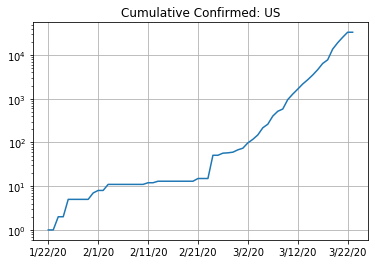

In [ ]:
nation_series.plot(
    logy=True, 
    title=f'Cumulative {series}: {nation}'
)
plt.grid(True)

# Load all time series and define static utility functions

In [ ]:
# Load series into a dict of pandas dataframes
series_options = ['Confirmed','Deaths','Recovered']
#series_options = [re.match(r'time_series_19-covid-(.*).csv',file)[1] for file in os.listdir(os.path.join(
#    covid19_dir,
#    'csse_covid_19_data',
#    'csse_covid_19_time_series'))
#  if re.match(r'time_series_19-covid-(.*).csv',file)
#]
series_frames = dict();
for series_to_read in series_options:
  ts_file = os.path.join(
    covid19_dir,
    'csse_covid_19_data',
    'csse_covid_19_time_series',
    f'time_series_19-covid-{series_to_read}.csv'    
  )
  series_frames[series_to_read] = pd.read_csv(ts_file, parse_dates=True, date_parser=pd.to_datetime)
    
series_frames.keys()

dict_keys(['Confirmed', 'Deaths', 'Recovered'])

In [ ]:
nation_series_cache = dict()
def get_nation_series(nation,series):
  if nation in nation_series_cache and series in nation_series_cache[nation]:
    nation_series = nation_series_cache[nation][series]
  else:
    ts_frame = series_frames[series]
    nationrows = ts_frame.loc[:, 'Country/Region'] == nation
    nation_frame = ts_frame[nationrows]
    nation_series = nation_frame.agg(np.sum)[4:]
    if nation not in nation_series_cache:
        nation_series_cache[nation] = dict()
    nation_series_cache[nation][series] = nation_series

  strdates = nation_series.keys()
  dates = [pd.to_datetime(sd) for sd in strdates]

  return (nation_series,dates)

nation_state_series_cache = dict()
def get_nation_state_series(nation,state,series):
  if nation in nation_state_series_cache and \
     state in nation_state_series_cache[nation] and \
     series in nation_state_series_cache[nation][state]:
    nation_state_series = nation_state_series_cache[nation][state][series]
  else:
    ts_frame = series_frames[series]
    nation_state_rows = (ts_frame.loc[:, 'Country/Region'] == nation) & (ts_frame.loc[:, 'Province/State'] == state)
    nation_state_frame = ts_frame[nation_state_rows]
    nation_state_series = nation_state_frame.iloc[0][4:]
    #nation_series = nation_frame.agg(np.sum)[4:]
    if nation not in nation_state_series_cache:
        nation_state_series_cache[nation] = dict()
    if state not in nation_state_series_cache[nation]:
        nation_state_series_cache[nation][state] = dict()
    nation_state_series_cache[nation][state][series] = nation_state_series

  strdates = nation_state_series.T.keys()
  print(strdates)
  dates = [pd.to_datetime(sd) for sd in strdates]

  return (nation_state_series,dates)

In [ ]:
# Need to manual edit the data due to known mistakes or out of date numbers? Do it here

# Force a cache load
get_nation_series('US','Confirmed')
# Set the data that needs to be modified
#nation_series_cache['US']['Confirmed']["3/18/20"] = 9415

# Update the global nation_series
nation_series = get_nation_series(nation,series)[0]
nation_series_cache['US']['Confirmed']["3/18/20"]

7783

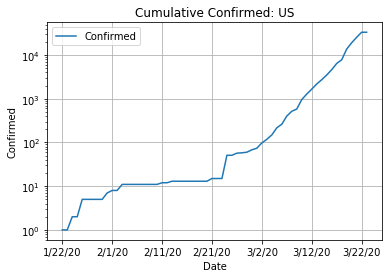

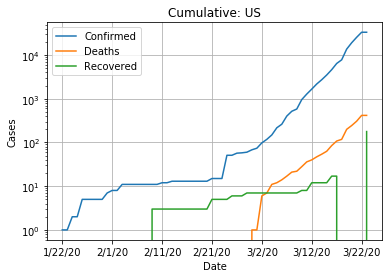

In [ ]:
nations = sorted(ts_frame.loc[:,'Country/Region'].unique())

# Plot a single series combining all the code above

def plot_single_series(nation,series):
  nation_series, dates = get_nation_series(nation,series)
  nation_series.plot(
      logy=True, 
      title=f'Cumulative {series}: {nation}'
  )
  plt.grid(True)
  plt.ylabel(series)
  plt.xlabel('Date')
  plt.legend([series])

# Plot all the series
def plot_all_series(nation):
  for series in series_options:
    plot_single_series(nation,series)
  plt.ylabel('Cases')
  plt.legend(series_options)
  plt.title(f'Cumulative: {nation}')

plt.figure()
plot_single_series(nation,series)

plt.figure()
plot_all_series(nation)

# Interactive

In [ ]:
from ipywidgets import interactive
import ipywidgets as widgets

nations_widget = widgets.Dropdown(
    options = nations,
    value = nation,
    description = "Nation: "
)

interactive(plot_single_series,nation=nations_widget,series=series_options)

interactive(children=(Dropdown(description='Nation: ', index=172, options=('Afghanistan', 'Albania', 'Algeria'…

In [ ]:
interactive(plot_all_series,nation=nations_widget)

interactive(children=(Dropdown(description='Nation: ', index=172, options=('Afghanistan', 'Albania', 'Algeria'…

# Rate Estimation

We would like to measure rates to understand how quickly the number of cases is increasing or decreasing. We expect the rate to be exponential, so our interest is in the slope of log plots above. We would also like to know these slopes over time.

Because the data is noisy, some fitting is required. Here I have chosen to do a spline fit. Once the spline fit is obtained, obtaining the derivatives is straightforward.

The derivative of the log of a function is the derivative of the function over the value of the function. For this data, this would give us how the rate of increase of cases compares to the number of cases.

## Spline Fits

In [ ]:
from scipy.interpolate import UnivariateSpline 
from scipy.interpolate import LSQUnivariateSpline

x = np.arange(nation_series.shape[0])
y = np.log10(np.float64(nation_series)+1)
knot_interval = 14;
t = np.flip(np.arange(nation_series.shape[0]-knot_interval,0,-knot_interval))
# Weight the last days by a factor of 10
w = np.ones_like(y)
w[-4:] = 10
nation_sp = UnivariateSpline(x,y,w)
nation_lsq_sp = LSQUnivariateSpline(x,y,t,w=w)
nation_sp_deriv = nation_sp.derivative(1)
nation_lsq_sp_deriv = nation_lsq_sp.derivative(1)

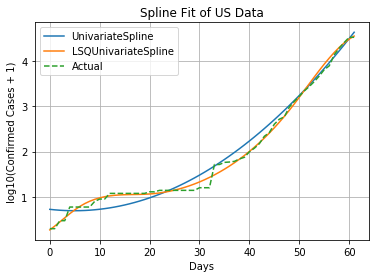

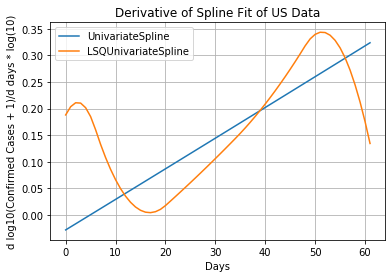

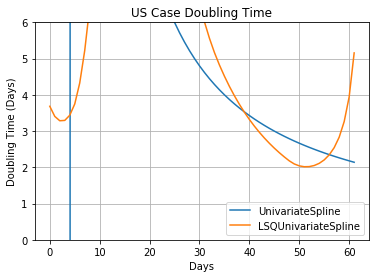

In [ ]:
plt.figure()
plt.plot(x,nation_sp(x))
plt.plot(x,nation_lsq_sp(x))
plt.plot(x,y,'--')
plt.grid(True)
plt.title(f'Spline Fit of {nation} Data')
plt.ylabel('log10(Confirmed Cases + 1)')
plt.xlabel('Days')
plt.legend(['UnivariateSpline','LSQUnivariateSpline','Actual'])


plt.figure()
plt.plot(x,nation_sp_deriv(x)*np.log(10))
plt.plot(x,nation_lsq_sp_deriv(x)*np.log(10))
plt.grid(True)
plt.title(f'Derivative of Spline Fit of {nation} Data')
plt.xlabel('Days')
plt.ylabel('d log10(Confirmed Cases + 1)/d days * log(10)')
plt.legend(['UnivariateSpline','LSQUnivariateSpline'])

plt.figure()
plt.plot(x,np.log(2)/(nation_sp_deriv(x)*np.log(10)))
plt.plot(x,np.log(2)/(nation_lsq_sp_deriv(x)*np.log(10)))
plt.grid(True)
plt.title(f'{nation} Case Doubling Time')
plt.xlabel('Days')
plt.ylabel('Doubling Time (Days)')
plt.ylim(0,6)
plt.legend(['UnivariateSpline','LSQUnivariateSpline'])


In [ ]:
def plot_spline_deriv(nation,series="Confirmed"):
  nation_series, dates = get_nation_series(nation,series)

  # We add 1 here to avoid taking the log of 0 if no data exists
  x = np.arange(nation_series.shape[0])
  y = np.log10(np.float64(nation_series+1))
  knot_interval = 14;
  t = np.flip(np.arange(nation_series.shape[0]-knot_interval,0,-knot_interval))

  # Weight the last days by a factor of 10
  w = np.ones_like(y)
  w[-4:] = 10
  #nation_sp = UnivariateSpline(x,y,w)
  nation_lsq_sp = LSQUnivariateSpline(x,y,t,w=w)
  #nation_sp_deriv = nation_sp.derivative(1)
  nation_lsq_sp_deriv = nation_lsq_sp.derivative(1)

  #plt.subplot(1,2,1)
  plt.figure()
  #plt.plot(dates,nation_sp(x))
  plt.plot(dates,nation_lsq_sp(x))
  plt.plot(dates,y)
  plt.grid(True)
  plt.title(f'Spline Fit of {nation} Data')
  plt.ylabel(f'log10({series} Cases+1)')
  #plt.xlabel('Days')
  plt.xticks(rotation=90)

  #plt.subplot(1,2,2)
  plt.figure()
  #plt.plot(dates,nation_sp_deriv(x)*np.log(10))
  plt.plot(dates,nation_lsq_sp_deriv(x)*np.log(10))
  plt.grid(True)
  plt.title(f'Derivative of Spline Fit of {nation} Data')
  #plt.xlabel('Days')
  plt.ylabel('d log10({series} Cases+1)/d days  * log(10)')
  plt.xticks(rotation=90)


In [ ]:
# The registry got reset somehow
pd.plotting.register_matplotlib_converters()

In [ ]:
interactive(plot_spline_deriv,nation=nations_widget,series=series_options)

interactive(children=(Dropdown(description='Nation: ', index=172, options=('Afghanistan', 'Albania', 'Algeria'…

In [ ]:
def plot_spline_double_time(nation,series="Confirmed"):
  nation_series, dates = get_nation_series(nation,series)

  # We add 1 here to avoid taking the log of 0 if no data exists
  x = np.arange(nation_series.shape[0])
  y = np.log10(np.float64(nation_series+1))
  knot_interval = 14;
  t = np.flip(np.arange(nation_series.shape[0]-knot_interval,0,-knot_interval))

  # Weight the last days by a factor of 10
  w = np.ones_like(y)
  w[-4:] = 10
  #nation_sp = UnivariateSpline(x,y,w)
  nation_lsq_sp = LSQUnivariateSpline(x,y,t,w=w)
  #nation_sp_deriv = nation_sp.derivative(1)
  nation_lsq_sp_deriv = nation_lsq_sp.derivative(1)

  #plt.subplot(1,2,1)
  plt.figure()
  plt.plot(dates,nation_lsq_sp(x))
  plt.plot(dates,y)
  plt.grid(True)
  plt.title(f'Spline Fit of {nation} Data')
  plt.ylabel(f'log10({series} Cases+1)')
  #plt.xlabel('Days')
  plt.xticks(rotation=90)

  #plt.subplot(1,2,2)
  plt.figure()
  plt.plot(dates,np.log(2)/(nation_lsq_sp_deriv(x)*np.log(10)))
  plt.grid(True)
  plt.title(f'{nation} Doubling Time')
  #plt.xlabel('Days')
  plt.ylabel('Doubling Time (days)')
  plt.xticks(rotation=90)
  plt.ylim(bottom=0,top=6)

In [ ]:
interactive(plot_spline_double_time,nation=nations_widget,series=series_options)

interactive(children=(Dropdown(description='Nation: ', index=172, options=('Afghanistan', 'Albania', 'Algeria'…

## Linear Regression

In [ ]:
from scipy import stats
def do_linear_regression(nation,series,n_points,days_back):
  nation_series, dates = get_nation_series(nation,series)
  days = np.arange(0,nation_series.shape[0])
  y = np.log(np.float64(nation_series+1))
  if days_back >= 0:
    s = slice(-n_points,None)
  else:
    s = slice(-n_points+days_back,days_back)
  lr = stats.linregress(days[s],y[s])
  
  plt.plot(days,y)
  line = lr.slope*days[s]+lr.intercept
  plt.plot(days[s],line)
  plt.grid(True)

  plt.xlabel('Days')
  plt.ylabel('log(Cases+1)')

  str = f"""Slope: {lr.slope:.3f}
Doubling time: {np.inf if lr.slope==0 else 0.693/lr.slope:.3f} days
Daily increase: {(np.exp(lr.slope)-1)*100:2.0f}%"""

  plt.text(days[s][0]-25,line[0],str)

  return lr
    
interactive(do_linear_regression,
            nation=nations_widget,
            series=series_options,
            n_points=widgets.IntSlider(value=4,min=2,max=nation_series.shape[0]),
            days_back=widgets.IntSlider(value=0,min=-nation_series.shape[0],max=0)
           )

interactive(children=(Dropdown(description='Nation: ', index=172, options=('Afghanistan', 'Albania', 'Algeria'…

In [ ]:
days = np.arange(0,nation_series.shape[0])
days[slice(-5,None)]

array([57, 58, 59, 60, 61])

# Extrapolation

Here we extrapolate at an exponential rate from the most recent case number.

In [ ]:
def get_linear_regression_of_log(nation_series,s = slice(-4,None)):
    lr = stats.linregress(np.arange(0,nation_series.shape[0])[s],np.log(np.float64(nation_series[s])))
    return lr
    
def days_until(nation_A,nation_B,series='Confirmed'):
    nation_A_series = get_nation_series(nation_A,series)[0]
    nation_B_series = get_nation_series(nation_B,series)[0]
    lr = get_linear_regression_of_log(nation_A_series)
    days = np.log(nation_B_series[-1]/nation_A_series[-1])/lr.slope
    print(f'{nation_A} will where {nation_B} is now in {days:.1f} days for {series}')
    return days

days_until('US','Italy')
days_until('US','China')

US will where Italy is now in 3.0 days for Confirmed
US will where China is now in 4.6 days for Confirmed


4.632805122267981

In [ ]:
day_to_day = dict()
day_to_day['ratio'] = nation_series[-1]/nation_series[-2]
day_to_day['coef'] = np.log(day_to_day['ratio'])
day_to_day['doubling_time'] = np.log(2)/day_to_day['coef']
day_to_day

{'ratio': 1.0001202212070208,
 'coef': 0.0001202139810306511,
 'doubling_time': 5765.944814548756}

LinregressResult(slope=0.1931913460000322, intercept=-1.2877578229042062, rvalue=0.9417878963066235, pvalue=0.05821210369337649, stderr=0.04876711991246138)

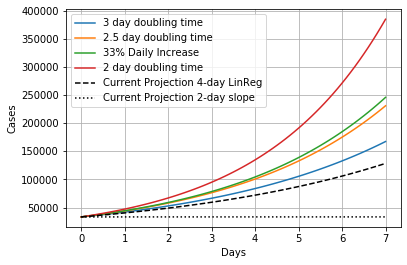

In [ ]:
us_confirmed_lr = get_linear_regression_of_log(nation_series)

t = np.arange(0,7.1,0.1)
plt.plot(t,np.exp(0.231*t)*nation_series[-1])
plt.plot(t,np.exp(0.277*t)*nation_series[-1])
plt.plot(t,np.exp(0.286*t)*nation_series[-1])
plt.plot(t,np.exp(0.35*t)*nation_series[-1])
plt.plot(t,np.exp(us_confirmed_lr.slope*t)*nation_series[-1],'k--')
plt.plot(t,np.exp(day_to_day['coef']*t)*nation_series[-1],'k:')
plt.grid(True)
plt.ylabel('Cases')
plt.xlabel('Days')
plt.legend(['3 day doubling time',
            '2.5 day doubling time',
            '33% Daily Increase',
            '2 day doubling time',
            'Current Projection 4-day LinReg',
            'Current Projection 2-day slope'])
us_confirmed_lr

In [ ]:
nation_series[-5:]

3/19/20    13677
3/20/20    19100
3/21/20    25489
3/22/20    33272
3/23/20    33276
dtype: object

In [ ]:
nation_series[-5:]/np.array(nation_series[-6:-1])

3/19/20    1.75729
3/20/20    1.39651
3/21/20     1.3345
3/22/20    1.30535
3/23/20    1.00012
dtype: object

In [ ]:
from datetime import timedelta
from datetime import date
next_day_projection = np.exp(us_confirmed_lr.slope)*nation_series[-1]
next_day = (dates[-1]+timedelta(days=1)).date().isoformat()
print(f'US Confirmed Case Projection {next_day}: {next_day_projection:0.1f}')

US Confirmed Case Projection 2020-03-24: 40367.6


In [ ]:
14250/9415

1.5135422198619224

In [ ]:
us_confirmed = get_nation_series('US','Confirmed')[0]
germany_confirmed = get_nation_series('Germany','Confirmed')[0]
iran_confirmed = get_nation_series('Iran','Confirmed')[0]
italy_confirmed = get_nation_series('Italy','Confirmed')[0]
spain_confirmed = get_nation_series('Spain','Confirmed')[0]
korea_confirmed = get_nation_series('Korea, South','Confirmed')[0]
china_confirmed = get_nation_series('China','Confirmed')[0]


us_deaths = get_nation_series('US','Deaths')[0]
germany_deaths = get_nation_series('Germany','Deaths')[0]
iran_deaths = get_nation_series('Iran','Deaths')[0]
italy_deaths = get_nation_series('Italy','Deaths')[0]
spain_deaths = get_nation_series('Spain','Deaths')[0]
korea_deaths = get_nation_series('Korea, South','Deaths')[0]

[33276.0, 24873.0, 21638.0, 28768.0, 59138.0]

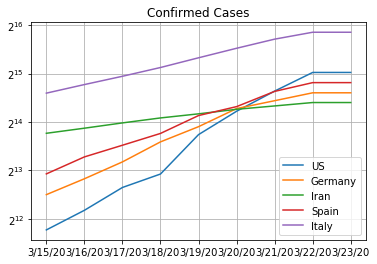

In [ ]:
us_confirmed[53:].plot(logy=True,)
germany_confirmed[53:].plot()
iran_confirmed[53:].plot()
spain_confirmed[53:].plot()
italy_confirmed[53:].plot()
plt.grid(True)
plt.yticks([10000,20000])
plt.legend(['US','Germany','Iran','Spain','Italy'])
plt.title('Confirmed Cases')
ax = plt.gca()
ax.set_yscale('log', basey=2)
[us_confirmed[-1],germany_confirmed[-1],iran_confirmed[-1],spain_confirmed[-1],italy_confirmed[-1]]

[417.0, 94.0, 1685.0, 1772.0, 5476.0]

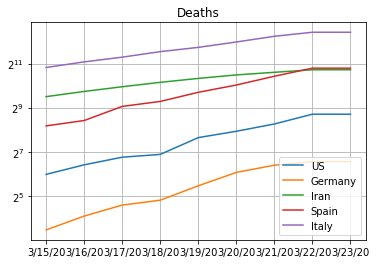

In [ ]:
us_deaths[53:].plot(logy=True,)
germany_deaths[53:].plot()
iran_deaths[53:].plot()
spain_deaths[53:].plot()
italy_deaths[53:].plot()
plt.grid(True)
plt.yticks([10000,20000])
plt.legend(['US','Germany','Iran','Spain','Italy'])
plt.title('Deaths')
ax = plt.gca()
ax.set_yscale('log', basey=2)
[us_deaths[-1],germany_deaths[-1],iran_deaths[-1],spain_deaths[-1],italy_deaths[-1]]

In [ ]:
us_deaths_lr = get_linear_regression_of_log(us_deaths)
germany_deaths_lr = get_linear_regression_of_log(germany_deaths)
iran_deaths_lr = get_linear_regression_of_log(iran_deaths)
spain_deaths_lr = get_linear_regression_of_log(spain_deaths)
italy_deaths_lr = get_linear_regression_of_log(italy_deaths)
death_slopes = [us_deaths_lr.slope,germany_deaths_lr.slope,iran_deaths_lr.slope,spain_deaths_lr.slope,italy_deaths_lr.slope]

italy_confirmed_lr = get_linear_regression_of_log(italy_confirmed)
spain_confirmed_lr = get_linear_regression_of_log(spain_confirmed)
germany_confirmed_lr = get_linear_regression_of_log(germany_confirmed)
china_confirmed_lr = get_linear_regression_of_log(china_confirmed)


Text(0.5, 1.0, 'Deaths Doubling Time (Higher = Better)')

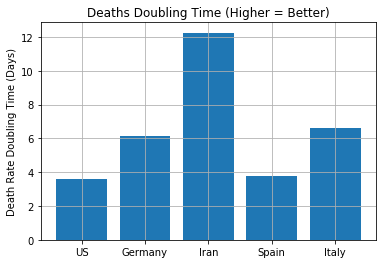

In [ ]:
plt.grid(True)
plt.bar(['US','Germany','Iran','Spain','Italy'],np.log(2)/death_slopes)
plt.ylabel('Death Rate Doubling Time (Days)')
plt.title('Deaths Doubling Time (Higher = Better)')

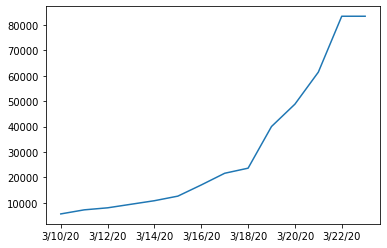

In [ ]:
(us_deaths[-14:]/0.005).plot()

In [ ]:
us_deaths[-14]/0.005

5600.0

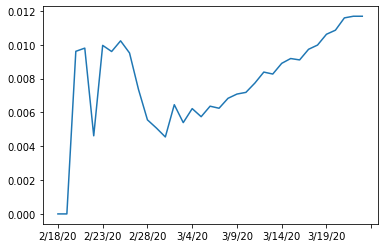

In [ ]:
(korea_deaths/korea_confirmed)[-35:].plot()

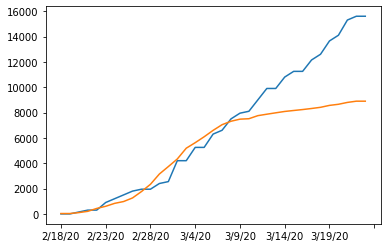

In [ ]:
(150*korea_deaths[-35:]).plot()
korea_confirmed[-35:].plot()

In [ ]:
1/150

0.006666666666666667

In [ ]:
us_confirmed[-5:]

3/19/20    13677
3/20/20    19100
3/21/20    25489
3/22/20    33272
3/23/20    33276
dtype: object

In [ ]:
us_deaths[-5:]

3/19/20    200
3/20/20    244
3/21/20    307
3/22/20    417
3/23/20    417
dtype: object

In [ ]:
us_confirmed[-1]

33276.0

In [ ]:
spain_confirmed[-1]

28768.0

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20'],
      dtype='object')


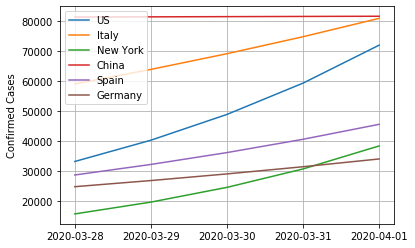

In [ ]:
new_york_confirmed, dates = get_nation_state_series('US','New York','Confirmed')
new_york_confirmed_lr = get_linear_regression_of_log(new_york_confirmed)

forward_dates = [datetime.date.today()+datetime.timedelta(x) for x in range(0,5)]
plt.plot(forward_dates,us_confirmed[-1]*np.exp(us_confirmed_lr.slope*x[0:5]))
plt.plot(forward_dates,italy_confirmed[-1]*np.exp(italy_confirmed_lr.slope*x[0:5]))
plt.plot(forward_dates,new_york_confirmed[-1]*np.exp(new_york_confirmed_lr.slope*x[0:5]))
plt.plot(forward_dates,china_confirmed[-1]*np.exp(china_confirmed_lr.slope*x[0:5]))
plt.plot(forward_dates,spain_confirmed[-1]*np.exp(spain_confirmed_lr.slope*x[0:5]))
plt.plot(forward_dates,germany_confirmed[-1]*np.exp(germany_confirmed_lr.slope*x[0:5]))
plt.ylabel('Confirmed Cases')
plt.xticks(forward_dates)
plt.legend(['US','Italy','New York','China','Spain','Germany'])
plt.grid(True)

In [ ]:
forward_dates

[datetime.date(2020, 3, 28),
 datetime.date(2020, 3, 29),
 datetime.date(2020, 3, 30),
 datetime.date(2020, 3, 31),
 datetime.date(2020, 4, 1)]

In [ ]:
0.693/new_york_confirmed_lr.slope

3.113983649063795

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20'],
      dtype='object')


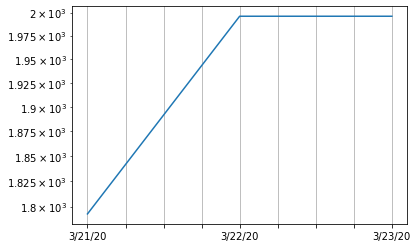

In [ ]:
washington_confirmed = get_nation_state_series('US','Washington','Confirmed')[0]
washington_confirmed_lr = get_linear_regression_of_log(washington_confirmed)
washington_confirmed[-3:].plot(logy=True)
plt.grid(True)

In [ ]:
np.diff(washington_confirmed[-6:])

array([362, 148, 269, 203, 0.0], dtype=object)

In [ ]:
np.diff(washington_confirmed[-6:])

array([362, 148, 269, 203, 0.0], dtype=object)